# Forward Euler

Author: Luke Vaughan
<br>
MATH 315 Differential Equations
<br>
WSU Vancouver
<br>
Spring 2023
<br>
$\textbf{____________________________________________________________________________________________________________________}$

#### Problem Stated in General Form

Solve an initial value problem (IVP) of the form 

$$\begin{align*}
\frac{dy}{dt} & = f(t,y) \; \; \; \; \; \; \; \; a \leq t \leq b \\
y(a) & = y_0
\end{align*}
$$

where the right-hand side, $f(t,y)$, is an expression in $t$ and $y$. We are seeking a solution over the interval $a \leq t \leq b $ given the initial condition $y(a) = y_0$.

**Example:** Given the IVP

$$
\begin{align*}
\frac{dy}{dt} & = \frac{t^2 + 1}{e^y} \; \; \; \; \; \; \; \; 0 \leq t \leq 20 \\
y(0) & = \ln 2
\end{align*}
$$

we have 

$$f(t,y) = \frac{t^2 + 1}{e^y}$$

which gives us a separable differential equation. 

#### Direct Approach

The **exact solution** is found below.

$$
\begin{align*}
\frac{dy}{dt} & = \frac{t^2 + 1}{e^y} \\
e^y dy & = (t^2 + 1)dt \\
\color{red}{\int} \color{black}{e^y dy} & = \color{red}{\int} \color{black}{(t^2 + 1)dt} \\
e^y & = \frac{t^3}{3} + t + C \\ 
\color{red}{\ln \biggr(} \color{black}{e^y} \color{red}{\biggr)} & = \color{red}{\ln \biggr(} \color{black}{\frac{t^3}{3} + t + C} \color{red}{\biggr)} \\
y & = \ln \biggr(\frac{t^3}{3} + t + C \biggr)
\end{align*}
$$

The initial condition $y(\color{blue}{0}\color{black}{)} = \color{blue}{\ln 2}$ gives us

$$
\begin{align*}
\color{blue}{\ln 2} & = \ln \biggr(\frac{(\color{blue}{0})^{\color{black}{3}}}{\color{black}{3}} \color{black}{+} \color{blue}{0} \color{black}{+ C} \biggr) \\
\ln 2 & = \ln C \\
\color{red}{e}^{\color{black}{\ln 2}} & = \color{red}{e}^{\color{black}{\ln C}} \\
2 & = C
\end{align*}
$$

so the exact solution is

$$y = \ln \biggr(\frac{t^3}{3} + t + 2 \biggr)$$

which is plotted below.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [2]:
#Define function: solution y    
    
def y(t):
    return math.log(t**3/3 + t + 2)

ts = np.linspace(-1,21,100) #ind var vector

ys = np.zeros(100) #dep var vector

#Call function to fill dep var vector in loop

for i in range(len(ys)):
    ys[i] = y(ts[i]) 

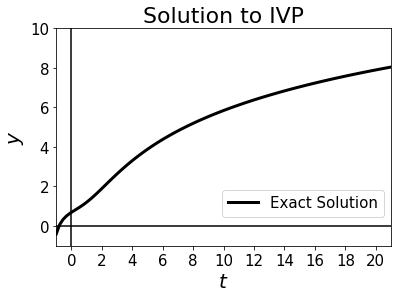

In [3]:
#Plot exact solution

plt.plot(ts, ys, color = 'black', linewidth = 3, label = 'Exact Solution')

plt.xticks(np.linspace(0,20,11))
plt.yticks(np.linspace(0,20,11))
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlim(-1,21)
plt.ylim(-1,10)

plt.xlabel('$t$', fontsize = 20)
plt.ylabel('$y$', fontsize = 20)
plt.title('Solution to IVP', fontsize = 22)

plt.axhline(y = 0, color = 'black') 
plt.axvline(x = 0, color = 'black') 

legend = plt.legend(prop = {'size': 15}, loc = 'lower right', bbox_to_anchor=(1.0, 0.5))
legend.set_bbox_to_anchor((1.0, 0.1))

Summary: the **exact solution** to the IVP

$$
\begin{align*}
\frac{dy}{dt} & = \frac{t^2 + 1}{e^y} \; \; \; \; \; \; \; \; 0 \leq t \leq 20 \\
y(0) & = \ln 2
\end{align*}
$$

is given as 

$$y = \ln \biggr(\frac{t^3}{3} + t + 2 \biggr)$$

#### Numerical Method

Given a function $g(t)$, its Taylor series expansion centered at $t = t_0$ is 

$$g(t) = g(t_0) + g'(t_0)\big(t - t_0\big) + \frac{g''(t_0)}{2!}\big(t - t_0\big)^2 + \frac{g'''(t_0)}{3!}\big(t - t_0\big)^3 + ... \; \; \; \; \; \; \; \; (*)$$

which we can use to derive numerical methods. Evaluate the Taylor series at $\color{blue}{t} \color{black}{=} \color{blue}{t_0 + h}$ (where $h$ is a small step away from $t_0$) to obtain
 
$$
\begin{align*}
g(\color{blue}{t_0 + h}) & = g(t_0) + g'(t_0)\big(\color{blue}{t_0 + h} \color{black}{- t_0\big) + \frac{g''(t_0)}{2!}\big(}\color{blue}{t_0 + h} \color{black}{- t_0\big)^2 + \frac{g'''(t_0)}{3!}\big(}\color{blue}{t_0 + h} \color{black}{- t_0\big)^3 + ...} \\
g(t_0 + h) & = g(t_0) + g'(t_0)\big(h\big) + \frac{g''(t_0)}{2!}\big(h\big)^2 + \frac{g'''(t_0)}{3!}\big(h\big)^3 + ...
\end{align*}
$$

which can be rewritten as 

$$g(t_0 + h) = g(t_0) + h g'(t_0) + \frac{h^2}{2!} g''(t_0) + \frac{h^3}{3!} g'''(t_0) + ... \; \; \; \; \; \; \; \; (**)$$

If we replace $g(t)$ with $y(t)$, the function that satisfies a given differential equation, we get

$$y(t_0 + h) = y(t_0) + h y'(t_0) + \frac{h^2}{2!} y''(t_0) + \frac{h^3}{3!} y'''(t_0) + ...$$

and if we drop the higher-order terms (for sufficiently small $h$), we obtain

$$y(t_0 + h) \approx y(t_0) + h y'(t_0) \; \; \; \; \; \; \; \; (1)$$

The transition from $=$ to $\approx$ is noteworthy. We are deriving a **numerical approximation**. 

The value $y(t_0)$ corresponds to the point $(t_0, y_0)$. So we can denote $y(t_0)$ as $y_0$. Also, recall that the differential equation (see "Problem Stated in General Form" above) is given as 

$$\frac{dy}{dt} = f(t,y)$$

which can be rewritten as 

$$y'(t) = f\big(t,y(t)\big)$$

which can be evaluated at $t = t_0$: 

$$y'(t)\biggr|_{t_0} = f\big(t,y(t)\big)\biggr|_{t_0}$$

$$y'(t_0) = f\big(t_0,y(t_0)\big)$$

$$y'(t_0) = f\big(t_0,y_0\big)$$

Therefore, Eq. (1) can be rewritten as 

$$y(t_0 + h) \approx y_0 + h f\big(t_0,y_0\big) \; \; \; \; \; \; \; \; (2)$$

We have three scalars on the right-hand side of Eq. (2). We are given the value for $y_0$ (the initial condition) in the IVP. The value for $h$ (the step size) is chosen by the mathematician. The value for $f(t_0,y_0)$ is the slope of the tangent line at the point $(t_0,y_0)$.

Eq. (2) gives us an approximation for the value of the solution $y$ after taking a small step $h$ away from the starting position $t_0$. In other words, given the point $(t_0,y_0)$, Eq. (2) gives us another point $(t_1,y_1)$. So Eq. (2) can be rewritten as 

$$y_1 = y_0 + h f\big(t_0,y_0\big) \; \; \; \; \; \; \; \; (3)$$

where we have made the transition from $\approx$ back to $=$ since the equation is verbally stated to be an approximation.

Let $t_i = a + ih$ (where $i = 0, 1, 2, ..., n$). If $t$ represents time, we say that we have $n$ "time steps" with equal spacing $h$. So we have

$$h = \frac{b - a}{n}$$

giving us known values in the set $\big\{a = t_0, t_1, t_2, ..., t_n = b\big\}$. The goal is to find unknown values in the set $\big\{y_0, y_1, y_2, ..., y_n\big\}$.

Since we can center the Taylor series wherever we want (at $t = t_i$), we can generalize/extend Eq. (3) to any two points $(t_i,y_i)$ and $(t_{i+1},y_{i+1})$. Generalizing Eq. (3) give us the algorithm

$$y_{i+1} = y_i + h f\big(t_i,y_i\big) \; \; \; \; \; \; \; \; (4)$$

where Eq. (4) is called **Forward Euler**. The derivation for the numerical method is complete. 

Use Forward Euler on the IVP above.

In [4]:
#Right-hand side of differential equation in IVP above

def f(t,y):
    return (t**2 + 1)/(np.exp(y))

In [5]:
#Parameters

a = 0                    #left endpoint
b = 20                   #right endpoint
n = 40                   #number of time steps: increase to improve numerical approximation
h = (b - a)/n            #step size

print('Number of time steps = ', n)
print('Step size h = ', h)

#Vectors: t values and approximations for y 

tvec = np.linspace(0,20,n+1)        
yvec = np.zeros(n+1)  

print('Length of tvec = ',len(tvec))
print('Length of yvec = ',len(yvec))

Number of time steps =  40
Step size h =  0.5
Length of tvec =  41
Length of yvec =  41


In [6]:
#Initial condition

tprev = 0                #t_0
yprev = math.log(2)      #y_0

#Initialize yvec

yvec[0] = yprev          #first value in yvec

#Use a for loop to implement Forward Euler

for i in range(len(tvec)-1):
    
    ynext = yprev + h*f(tprev,yprev)     #Forward Euler
    yvec[i+1] = ynext                    #put the next value y_(i+1) in yvec
    
    tprev = tprev + h                    #increase t_i by h
    yprev = ynext                        #set the stage to repeat Forward Euler
    
print('Approximations in yvec: ',yvec)

Approximations in yvec:  [0.69314718 0.94314718 1.18652243 1.49180348 1.85737415 2.247579
 2.63057731 2.99076162 3.32366225 3.62983797 3.91161808 4.17172338
 4.41274921 4.63700264 4.84647728 5.04287737 5.22765597 5.40205386
 5.56713424 5.72381229 5.87287973 6.0150249  6.15084934 6.28088124
 6.40558661 6.52537841 6.64062413 6.75165213 6.85875688 6.96220342
 7.0622311  7.15905675 7.25287741 7.34387261 7.4322064  7.51802902
 7.60147845 7.68268166 7.76175577 7.838809   7.91394159]


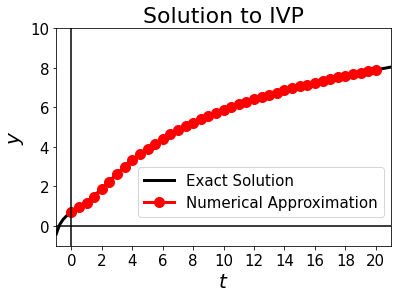

In [7]:
#Plot exact solution and numerical approximation

plt.plot(ts, ys, color = 'black', linewidth = 3, label = 'Exact Solution')
plt.plot(tvec, yvec, color = 'red', marker='o', linestyle='-', markersize = 10, linewidth = 3, label = 'Numerical Approximation')

plt.xticks(np.linspace(0,20,11))
plt.yticks(np.linspace(0,20,11))
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlim(-1,21)
plt.ylim(-1,10)

plt.xlabel('$t$', fontsize = 20)
plt.ylabel('$y$', fontsize = 20)
plt.title('Solution to IVP', fontsize = 22)

plt.axhline(y = 0, color = 'black') 
plt.axvline(x = 0, color = 'black') 

legend = plt.legend(prop = {'size': 15}, loc = 'lower right', bbox_to_anchor=(1.0, 0.5))
legend.set_bbox_to_anchor((1.0, 0.1))